<a href="https://colab.research.google.com/github/mirandaqiqi1219/League_of_Legends_Classification/blob/master/League_of_Legends_Classification_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# League of Legends Pro League Competition Data (From 2014 To 2018)

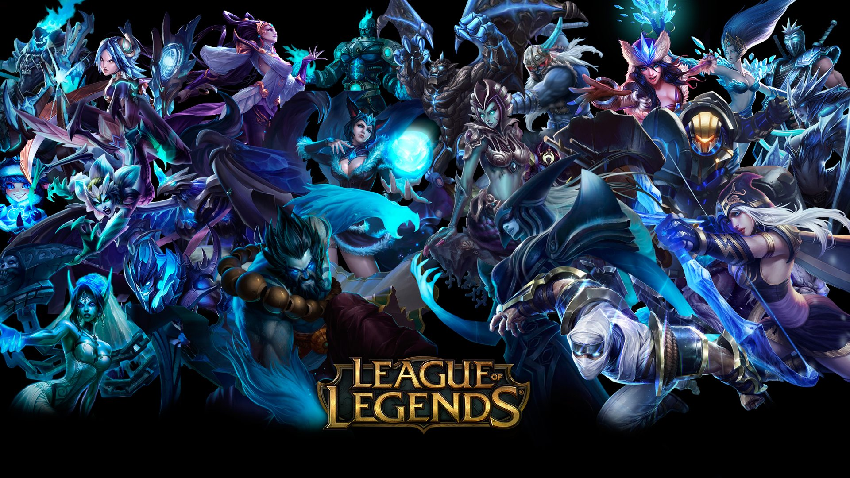

In [0]:
from IPython.display import Image
Image("lol_cover.png", width=800)

**League of Legends** (abbreviated LoL) is a multiplayer online battle arena video game. In this game, players assume the role of a "summoner" that controls a "champion" with unique abilities. There are two teams (blue team and red team), each team has 5 members. Each LoL match is discrete, with all champions starting off fairly weak but increasing in strength by accumulating items and experience over the course of the game. The goal is usually to destroy the opposing team's base. In order to destroy opposing team's nexus, players also need to push towers, kill opposing team members, kill the barons/dragons. Below is a map of this game. There are three lanes in this game (top/middle/bottom)

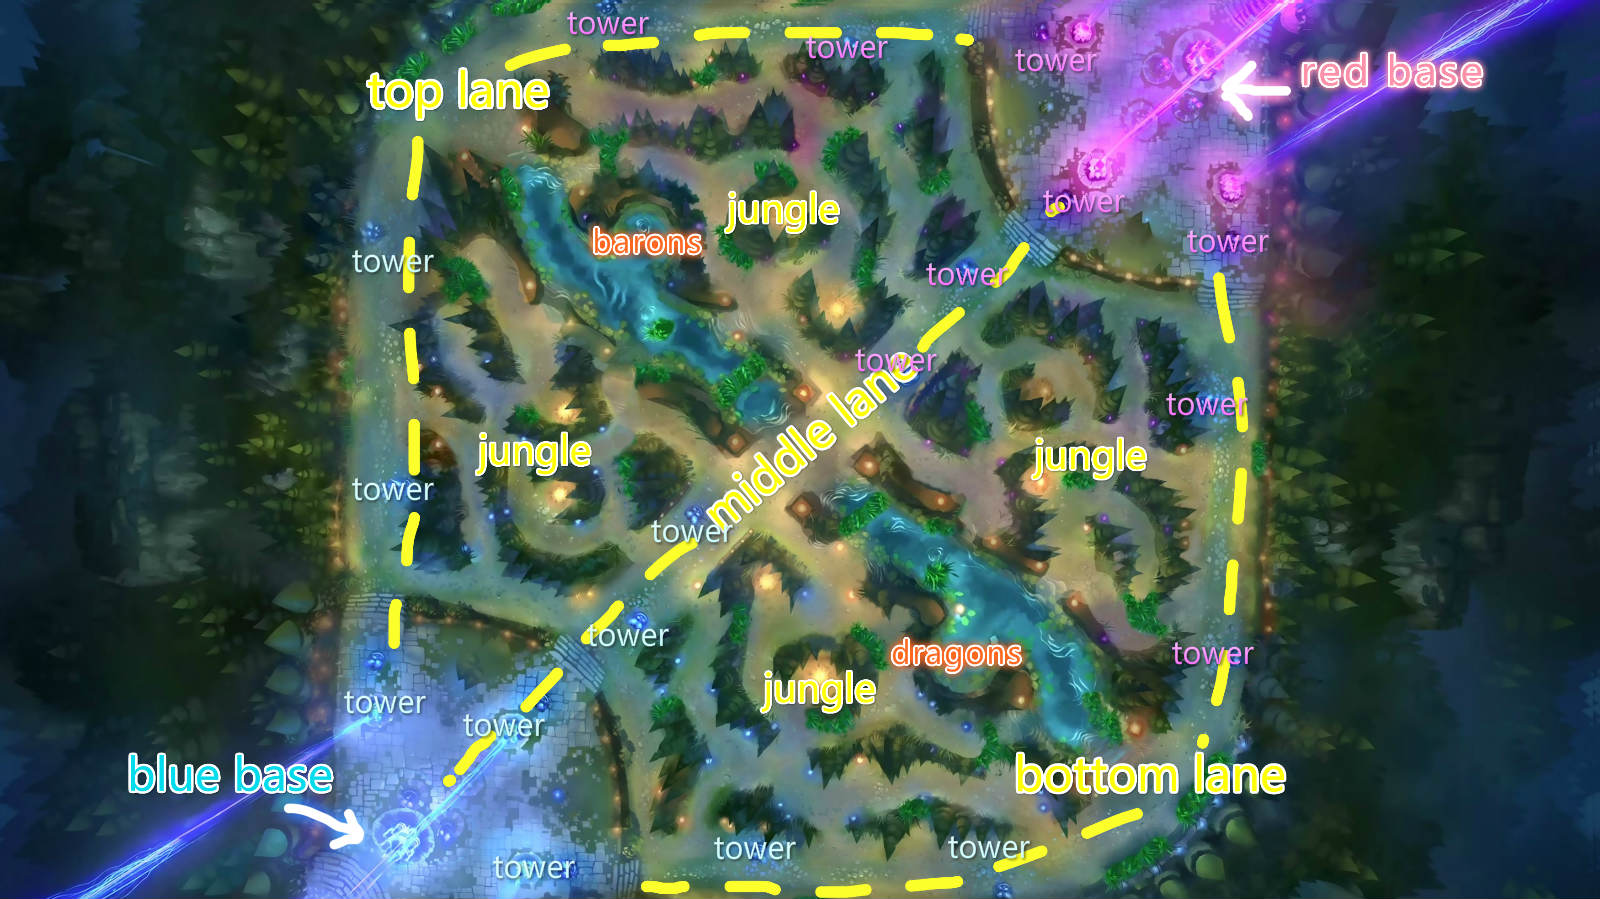

In [0]:
Image("map_lol_final.jpg", width=800)

# Ingest

this data is based on the LoL Pro League Competition data from 2014 to 2018

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_csv('/content/LeagueofLegends.csv')

In [0]:
df = data.dropna()
df.head(3)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...


##Feature Engineering


In order to do visualization and classification, I need to covert variables that can show the total number of this variables, instead of pseudo list. (r_barons, b_barons, r_Kills, b_Kills, r_Towers, b_Towers, b_dragons, r_dragons, season, redgold, bluegold)

In [0]:
df[['rBarons', 'bBarons', 'rKills', 'bKills', 'rTowers', 'bTowers', 'rDragons', 'bDragons']].head(3)

,rBarons,bBarons,rKills,bKills,rTowers,bTowers,rDragons,bDragons
0,[[29.954]],[],"[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[17.14, None], [30.934, None], [24.641, None]]","[[37.267, None]]"
1,[],[[29.255]],"[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...","[[12.264, None]]","[[32.545, None], [26.177, None], [19.119, None]]"
2,[],[[35.144]],"[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...",[],"[[24.577, None], [37.867, None], [30.87, None]..."


###Total Barons

In [0]:
#blue barons
blue_barons = df[['bBarons']]
blue_barons_new = [] 
for index, row in blue_barons.iterrows():
  new_index =  (len(row['bBarons']))
  blue_barons_new.append(new_index)

b_barons_new = pd.DataFrame(data=blue_barons_new,columns=['blue_barons'],dtype=np.int8)

In [0]:
check = b_barons_new.drop_duplicates()
check

,blue_barons
0,2
1,10
7,20
26,9
98,19
121,30
134,18
167,8
194,29
248,39


In [0]:
b_barons_new['blue_barons'] = b_barons_new['blue_barons'].map({2:0, 8:1, 9:1, 10:1, 17:2, 18:2, 19:2, 20:2, 28:3, 29:3, 30:3, 38:4, 39:4, 40:4, 50:5})
b_barons_count = b_barons_new
b_barons_count.head(2)

,blue_barons
0,0
1,1


In [0]:
#red barons
red_barons = df[['rBarons']]
red_barons_new = [] 
for index, row in red_barons.iterrows():
  new_index =  (len(row['rBarons']))
  red_barons_new.append(new_index)

r_barons_new = pd.DataFrame(data=red_barons_new,columns=['red_barons'],dtype=np.int8)

In [0]:
check = r_barons_new.drop_duplicates()
check

,red_barons
0,10
1,2
16,20
27,18
34,30
48,9
75,19
318,40
345,29
425,39


In [0]:
r_barons_new['red_barons'] = r_barons_new['red_barons'].map({2:0, 8:1, 9:1, 10:1, 17:2, 18:2, 19:2, 20:2, 26:3, 27:3, 28:3, 29:3, 30:3, 38:4, 39:4, 40:4, 48:5, 49:5, 50:5, 58:6})
r_barons_count = r_barons_new
r_barons_count.head(2)

,red_barons
0,1
1,0


###Total Kills

In [0]:
kills = df[['bKills','rKills']]
kills.head(3)

,bKills,rKills
0,"[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete..."
1,"[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship..."
2,"[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu..."


In [0]:
# Transform all columns that containing pseudo lists to real lists
kills['bKills'] = kills['bKills'].apply(literal_eval)
kills['rKills'] = kills['rKills'].apply(literal_eval)

# Define a function to only extract time points in the list
def extract_minutes(item):
    try:
        return[item[0] for item in item]
    except:
        return[0 for item in item]

# Creating a table include the original column and time column`
kills['bKills_min'] = kills['bKills'].apply(extract_minutes)
kills['rKills_min'] = kills['rKills'].apply(extract_minutes)
kills = kills[['bKills', 'bKills_min', 'rKills', 'rKills_min']]
kills.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,bKills,bKills_min,rKills,rKills_min
0,"[[10.82, C9 Hai, TSM Bjergsen, [], 9229, 8469]...","[10.82, 16.286, 18.733, 18.88, 27.005, 27.029,...","[[16.529, TSM Lustboy, C9 Balls, [C9 Meteos, C...","[16.529, 16.791, 18.784, 27.073, 29.983, 30.11..."
1,"[[11.104, DIG Shiphtur, CST Jesiz, [CST Impale...","[11.104, 12.332, 12.392, 12.665, 14.837, 25.00...","[[12.387, CST Jesiz, DIG Gamsu, [DIG Shiphtur]...","[12.387, 12.689, 14.882, 25.119, 26.214, 29.35..."


In [0]:
#split each element in the list into muiltiple columns
df_kills_blue = kills[['bKills_min']].unstack().apply(pd.Series)
df_kills_red = kills[['rKills_min']].unstack().apply(pd.Series)
df_kills_blue.head(2)

0       1       2       3       4       5       6       7   \
bKills_min 0  10.820  16.286  18.733  18.880  27.005  27.029  27.109  28.989   
           1  11.104  12.332  12.392  12.665  14.837  25.008  25.134  28.412   

                  8       9  ...  61  62  63  64  65  66  67  68  69  70  
bKills_min 0  29.073  30.104 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
           1  30.128  32.367 ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 71 columns]

In [0]:
#blue kills
#In order to get the total kill number, count the number of time points for each row.
kills_blue_count = df_kills_blue.count(axis = 1)
#trans the Series into dataframe
kills_blue_test = pd.DataFrame(data=kills_blue_count,columns=['blue_kills'],dtype=np.int8)
blue_kills = kills_blue_test[['blue_kills']]
blue_kills_final = blue_kills.reset_index(drop=True)


#red kills
kills_red_count = df_kills_red.count(axis = 1)
kills_red_test = pd.DataFrame(data=kills_red_count,columns=['red_kills'],dtype=np.int8)
red_kills = kills_red_test[['red_kills']]
red_kills_final = red_kills.reset_index(drop=True)

#kills table
kills_final = blue_kills_final.join(red_kills_final)
kills_final.head()

,blue_kills,red_kills
0,16,9
1,10,9
2,22,8
3,10,21
4,22,10


###Total Dragons

In [0]:
dragons = df[['bDragons','rDragons']]
dragons['bDragons'] = dragons['bDragons'].apply(literal_eval)
dragons['rDragons'] = dragons['rDragons'].apply(literal_eval)

# Creating function to only extract  minutelist
def extract_minutes(item):
    try:
        return[item[0] for item in item]
    except:
        return[0 for item in item]

# Creating a table include time column
dragons['bDragons_min'] = dragons['bDragons'].apply(extract_minutes)
dragons['rDragons_min'] = dragons['rDragons'].apply(extract_minutes)
dragons = dragons[['bDragons', 'bDragons_min', 'rDragons', 'rDragons_min']]
dragons.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,bDragons,bDragons_min,rDragons,rDragons_min
0,"[[37.267, None]]",[37.267],"[[17.14, None], [30.934, None], [24.641, None]]","[17.14, 30.934, 24.641]"
1,"[[32.545, None], [26.177, None], [19.119, None]]","[32.545, 26.177, 19.119]","[[12.264, None]]",[12.264]


In [0]:
df_dragons_blue = dragons[['bDragons_min']].unstack().apply(pd.Series)
df_dragons_red = dragons[['rDragons_min']].unstack().apply(pd.Series)
df_dragons_blue.head(2)

0       1       2   3   4   5   6   7
bDragons_min 0  37.267     NaN     NaN NaN NaN NaN NaN NaN
             1  32.545  26.177  19.119 NaN NaN NaN NaN NaN

In [0]:
#blue dragons
dragons_blue_count = df_dragons_blue.count(axis = 1)
dragons_blue_test = pd.DataFrame(data=dragons_blue_count,columns=['blue_dragons'],dtype=np.int8)
blue_dragons = dragons_blue_test[['blue_dragons']]
blue_dragons_final = blue_dragons.reset_index(drop=True)

#red dragons
dragons_red_count = df_dragons_red.count(axis = 1)
dragons_red_test = pd.DataFrame(data=dragons_red_count,columns=['red_dragons'],dtype=np.int8)
red_dragons = dragons_red_test[['red_dragons']]
red_dragons_final = red_dragons.reset_index(drop=True)

blue_dragons_final.head(2)

,blue_dragons
0,1
1,3


###Total Towers

In [0]:
towers = df[['bTowers','rTowers']]
towers['bTowers'] = towers['bTowers'].apply(literal_eval)
towers['rTowers'] = towers['rTowers'].apply(literal_eval)

# Creating function to only extract  minutelist
def extract_minutes(item):
    try:
        return[item[0] for item in item]
    except:
        return[0 for item in item]

# Creating a table include time column
towers['bTowers_min'] = towers['bTowers'].apply(extract_minutes)
towers['rTowers_min'] = towers['rTowers'].apply(extract_minutes)
towers = towers[['bTowers', 'bTowers_min', 'rTowers', 'rTowers_min']]
towers.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,bTowers,bTowers_min,rTowers,rTowers_min
0,"[[27.542, MID_LANE, BASE_TURRET], [39.269, MID...","[27.542, 39.269, 33.583, 23.038, 16.556, 15.01...","[[39.23, TOP_LANE, INNER_TURRET], [20.681, MID...","[39.23, 20.681, 15.288, 17.237]"
1,"[[23.239, BOT_LANE, OUTER_TURRET], [33.018, BO...","[23.239, 33.018, 28.989, 25.564, 20.058, 15.30...","[[19.257, MID_LANE, OUTER_TURRET], [15.206, BO...","[19.257, 15.206, 36.936, 23.409, 29.993, 37.00..."


In [0]:
df_towers_blue = towers[['bTowers_min']].unstack().apply(pd.Series)
df_towers_red = towers[['rTowers_min']].unstack().apply(pd.Series)
df_towers_blue.head(2)

0       1       2       3       4       5       6       7   \
bTowers_min 0  27.542  39.269  33.583  23.038  16.556  15.014  39.376  15.217   
            1  23.239  33.018  28.989  25.564  20.058  15.306  34.766     NaN   

                   8   9   10  11  12  13  14  15  
bTowers_min 0  17.856 NaN NaN NaN NaN NaN NaN NaN  
            1     NaN NaN NaN NaN NaN NaN NaN NaN

In [0]:
#blue towers
towers_blue_count = df_towers_blue.count(axis = 1)
towers_blue_test = pd.DataFrame(data=towers_blue_count,columns=['blue_towers'],dtype=np.int8)
blue_towers = towers_blue_test[['blue_towers']]
blue_towers_final = blue_towers.reset_index(drop=True)

#red towers
towers_red_count = df_towers_red.count(axis = 1)
towers_red_test = pd.DataFrame(data=towers_red_count,columns=['red_towers'],dtype=np.int8)
red_towers = towers_red_test[['red_towers']]
red_towers_final = red_towers.reset_index(drop=True)

blue_towers_final.head(2)

,blue_towers
0,9
1,7


###Total Gold

In [0]:
gold = df[['goldred','goldblue']]

# Transform all other columns containing pseudo lists to real lists
gold['goldblue'] = gold['goldblue'].apply(literal_eval)
gold['goldred'] = gold['goldred'].apply(literal_eval)

#split each element in the list into muiltiple columns
df_gold_blue = gold[['goldblue']].unstack().apply(pd.Series)
df_gold_red = gold[['goldred']].unstack().apply(pd.Series)

#max is the final gold of each team, hence only keep the maximum of each row
redgold_final = df_gold_red.max(axis = 1)
bluegold_final = df_gold_blue.max(axis = 1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
#reset the index
blue_gold_test = pd.DataFrame(data=bluegold_final,columns=['bluegold'])
blue_gold = blue_gold_test[['bluegold']]
blue_gold_final = blue_gold.reset_index(drop=True)

red_gold_test = pd.DataFrame(data=redgold_final,columns=['redgold'])
red_gold = red_gold_test[['redgold']]
red_gold_final = red_gold.reset_index(drop=True)



blue_gold_final.head()

,bluegold
0,62729.0
1,57702.0
2,70270.0
3,58612.0
4,60269.0


###Season

In [0]:
season = df[['Season']]
season['Season'] = season['Season'].map({'Spring': 0, 'Summer':1})
season_new = season

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##Combined all variables as one dataframe

In [0]:
#Season Variable
season = df[['Season']]
season['Season'] = season['Season'].map({'Spring': 0, 'Summer':1})
season_new = season

#other variables: year, result, gamelength
result_1 = df[['gamelength','Year','bResult','rResult']]

#combined together
result = b_barons_count.join(r_barons_count)
result = result.join(blue_kills_final)
result = result.join(red_kills_final)
result = result.join(blue_dragons_final)
result = result.join(red_dragons_final)
result = result.join(blue_towers_final)
result = result.join(red_towers_final)
result = result.join(blue_gold_final)
result = result.join(red_gold_final)
result = result.join(season)
result = result.join(result_1)

result.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,blue_barons,red_barons,blue_kills,red_kills,blue_dragons,red_dragons,blue_towers,red_towers,bluegold,redgold,Season,gamelength,Year,bResult,rResult
0,0,1,16,9,1,3,9,4,62729.0,56672.0,0.0,40.0,2015.0,1.0,0.0
1,1,0,10,9,3,1,7,7,57702.0,56537.0,0.0,38.0,2015.0,0.0,1.0
2,1,0,22,8,4,0,15,2,70270.0,56355.0,0.0,40.0,2015.0,1.0,0.0
3,1,0,10,21,0,4,4,7,58612.0,63119.0,0.0,41.0,2015.0,0.0,1.0
4,1,0,22,10,2,1,8,4,60269.0,48947.0,0.0,35.0,2015.0,1.0,0.0


#EDA

##1. The relationship between the game length and game result (Kernel density estimation)

In [0]:
#first, figure out the relationship between the game length and game result
gamelength = df[['gamelength','bResult','rResult']]
gamelength[['bResult', 'gamelength']] = gamelength[['bResult', 'gamelength']].astype(float)
gamelength['BResult'] = gamelength['bResult']*gamelength['gamelength']
gamelength[['rResult', 'gamelength']] = gamelength[['rResult', 'gamelength']].astype(float)
gamelength['RResult'] = gamelength['rResult']*gamelength['gamelength']

blue_result = gamelength[['BResult']].astype(int)
red_result = gamelength[['RResult']].astype(int) 

#red team time (win condition)
lDrop_r = []
for index, row in red_result.iterrows():
  if row['RResult'] == 0:
    lDrop_r.append(index)
red_result = red_result.drop(lDrop_r)

#blue team time (win condition)
lDrop_b = []
for index, row in blue_result.iterrows():
  if row['BResult'] == 0:
    lDrop_b.append(index)
blue_result = blue_result.drop(lDrop_b)

#concat blue team and red team data into one dataframe
blue_result = blue_result.reset_index()
red_result = red_result.reset_index()

blue_result = blue_result[['BResult']]
red_result = red_result[['RResult']]

game = blue_result.join(red_result)
game = game.dropna()

###Kernel density estimation - relationship between the game length and game result

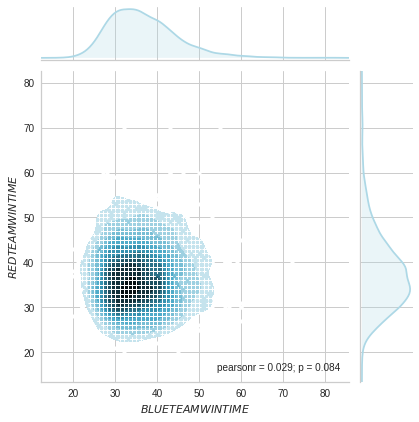

In [0]:
g = sns.jointplot(x='BResult', y = 'RResult', data = game, kind="kde", color="lightblue")
g.plot_joint(plt.scatter, c="w", s=10, linewidth=1,marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$BLUE TEAM WIN TIME$", "$RED TEAM WIN TIME$");

**Conclusion**: The peak winning time of Blue team and Red team is between 28 and 40 minutes 

##2. The Most Popular Champions in the LOL Pro League Competition (word cloud)

In [0]:
#the most popular champions that player choose
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imageio import imread

In [0]:
b1 = df[['blueTopChamp']]
b1 = b1.rename(index=str, columns={"blueTopChamp": "a"})
b2 = df[['blueJungleChamp']]
b2 = b2.rename(index=str, columns={"blueJungleChamp": "a"})
b3 = df[['blueMiddleChamp']]
b3 = b3.rename(index=str, columns={"blueMiddleChamp": "a"})
b4 = df[['blueADCChamp']]
b4 = b4.rename(index=str, columns={"blueADCChamp": "a"})
b5 = df[['blueSupportChamp']]
b5 = b5.rename(index=str, columns={"blueSupportChamp": "a"})
r1 = df[['redTopChamp']]
r1 = r1.rename(index=str, columns={"redTopChamp": "a"})
r2 = df[['redJungleChamp']]
r2 = r2.rename(index=str, columns={"redJungleChamp": "a"})
r3 = df[['redMiddleChamp']]
r3 = r3.rename(index=str, columns={"redMiddleChamp": "a"})
r4 = df[['redADCChamp']]
r4 = r4.rename(index=str, columns={"redADCChamp": "a"})
r5 = df[['redSupportChamp']]
r5 = r5.rename(index=str, columns={"redSupportChamp": "a"})
b_and_r = [b1,b2,b3,b4,b5,r1,r2,r3,r4,r5]
champion = pd.concat(b_and_r)

In [0]:
!curl https://banner2.kisspng.com/20180601/toc/kisspng-league-of-legends-computer-icons-riot-games-wall-decals-5b11738fa68869.6388308715278703516821.jpg > lol.jpg

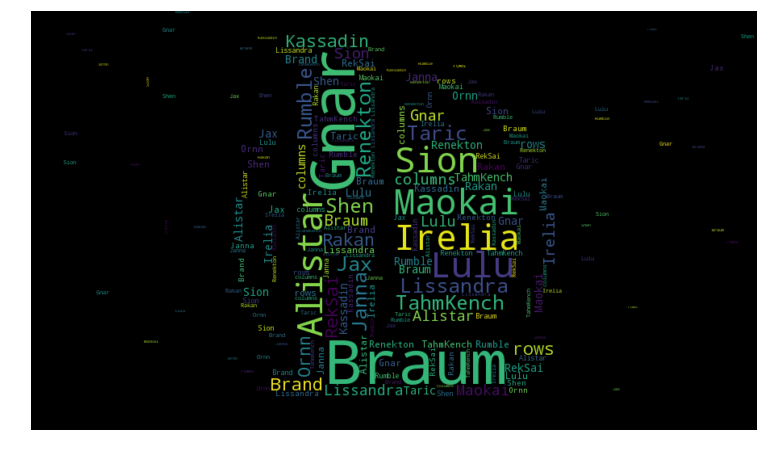

In [0]:
mask = imread("lol.jpg") #upload lol logo picture as my background.

picture = WordCloud(mask = mask, repeat=True,background_color="black").generate(str(champion))
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[13,13])
#plt.imshow(picture.recolor(color_func=image_colors))
plt.imshow(picture, interpolation="bilinear")
plt.axis("off")
plt.show()


**Conclusion**: Braum and Gnar are the most popular champions that were selected by players in LOL Pro League Competition

##3. Whether the team location (blue team or red team) can influence the result of the game?

In [0]:
wins_table = df.pivot_table(index = 'Year', values = ['bResult', 'rResult'], aggfunc = np.sum,  
                                margins = False)
wins_table['b_net_wins'] = wins_table['bResult'] - wins_table['rResult']
wins_table['b_win_pcnt'] = wins_table['bResult'] / (wins_table['bResult'] + wins_table['rResult'])
wins_table['b_pcnt_diff'] = wins_table['b_win_pcnt'] -.5
wins_table

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


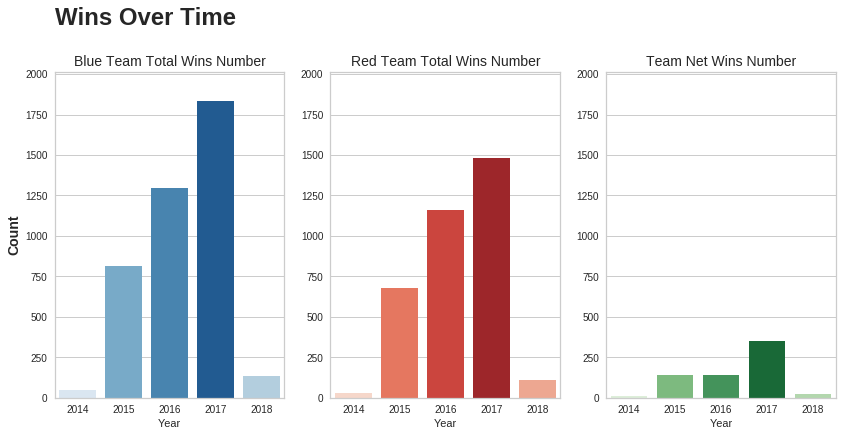

In [0]:
# Set plot styles and colors
blues = sns.color_palette('Blues', 5)
reds = sns.color_palette('Reds', 5)
greens = sns.color_palette('Greens', 5)

# Control y 
y_max = 1.1 * max(max(wins_table['bResult']), max(wins_table['rResult']))

fig, axes = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Wins Over Time', x=0.125, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')

# Blue Total Wins Plot
plt.subplot(1,3,1)
sns.barplot(x=wins_table.index, y='bResult', data = wins_table, palette=[blues[0], blues[2], blues[3], blues[4], blues [1]])
plt.title('Blue Team Total Wins Number', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')

# Red Total Wins Plot
plt.subplot(1,3,2)
sns.barplot(x=wins_table.index, y='rResult', data = wins_table, palette=[reds[0], reds[2], reds[3], reds[4], reds [1]])
plt.title('Red Team Total Wins Number', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

# Blue Net Wins Plot
plt.subplot(1,3,3)
sns.barplot(x=wins_table.index, y='b_net_wins', data = wins_table, palette=[greens[0], greens[2], greens[3], greens[4], greens[1]])
plt.title('Team Net Wins Number', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

plt.show()

**Conclusion:** Looks like blue team wins more often than red team. We can clearly see this in the right most plot, "Team Net Wins", which only shows positive valued bars which indicate the blue net wins (negative would indicate red net wins).

##4. Correlation among each variables (Heat Map)

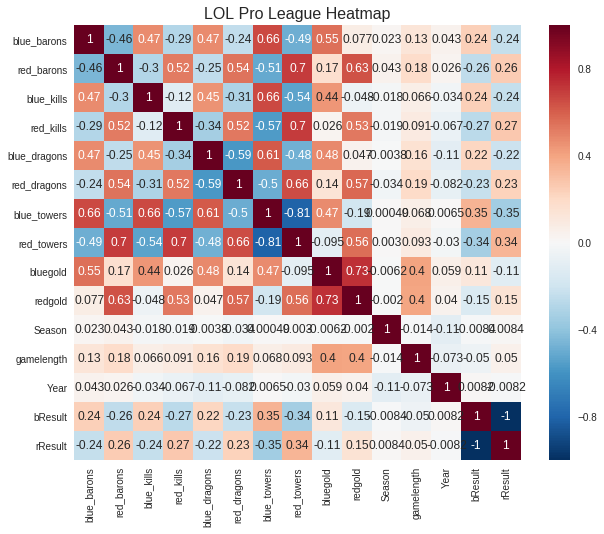

In [0]:
#LOL Pro League
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("LOL Pro League Heatmap", size = 16)
corr = result.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
#According to the heat map, drop the serial No. in the final prediction

**Conclusion**: Year and Season do not have any strong correlation with other variables. Hence, drop these two in the classification part.

#Modeling

What's the probability that blue team win the game?  Utilizing Classification to explore it.

In [0]:
# prepare the dataframe
blue_win_1 = result.drop( columns = ['Year', 'Season', 'rResult','redgold','bluegold'])
blue_win = blue_win_1.dropna()
blue_win.head()

,blue_barons,red_barons,blue_kills,red_kills,blue_dragons,red_dragons,blue_towers,red_towers,gamelength,bResult
0,0,1,16,9,1,3,9,4,40.0,1.0
1,1,0,10,9,3,1,7,7,38.0,0.0
2,1,0,22,8,4,0,15,2,40.0,1.0
3,1,0,10,21,0,4,4,7,41.0,0.0
4,1,0,22,10,2,1,8,4,35.0,1.0


In [0]:
#split data into train and test dataset

X = blue_win.drop(columns = ['bResult'])
y = blue_win[['bResult']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.36, random_state=1)


##Classification

###test model accuracy (F1 score)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

###KNN 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

my_model = KNeighborsClassifier()
my_model.fit(X_train, y_train)

knn_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


###Naive Bayes (GaussianNB, BernoulliNB, MultinomialNB)

In [0]:
from sklearn.naive_bayes import MultinomialNB


my_model = MultinomialNB()
my_model.fit(X_train, y_train)

MultinomialNB_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
from sklearn.naive_bayes import GaussianNB

my_model = GaussianNB ()
my_model.fit(X_train, y_train)

GaussianNB_score = my_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.naive_bayes import BernoulliNB

my_model = BernoulliNB ()
my_model.fit(X_train, y_train)

BernoulliNB_score = my_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###LinearSVC, NuSVC, SVC

In [0]:
from sklearn.svm import LinearSVC
my_model = LinearSVC()
my_model.fit(X_train, y_train)

#accuracy
LinearSVC_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder direc

In [0]:
from sklearn.svm import NuSVC
my_model = NuSVC()
my_model.fit(X_train, y_train)

#accuaracy
NuSVC_score = my_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn.svm import SVC
my_model = SVC()
my_model.fit(X_train, y_train)

#accuracy
SVC_score = my_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### LogisticRegression, LogisticRegressionCV, SGDClassifier

In [0]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(X_train, y_train)

#accuracy
LogisticRegression_score = model_selection(X, y, my_model)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder dir

In [0]:
from sklearn.linear_model import LogisticRegressionCV
my_model = LogisticRegressionCV()
my_model.fit(X_train, y_train)

#precision
LogisticRegressionCV_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert

In [0]:
from sklearn.linear_model import SGDClassifier
my_model = SGDClassifier()
my_model.fit(X_train, y_train)

#accuracy
SGDClassifier_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warn

###BaggingClassifier,  RandomForestClassifier

In [0]:
from sklearn.ensemble import BaggingClassifier

my_model = BaggingClassifier()
my_model.fit(X_train, y_train)

#precision
BaggingClassifier_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier()
my_model.fit(X_train, y_train)

#precision
RandomForestClassifier_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now us

##Extra Trees Classifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

my_model = ExtraTreesClassifier()
my_model.fit(X_train, y_train)

#result probability
blue_win_1 =  my_model.predict_proba(X_test)[:, 1]
blue_win_probability = pd.DataFrame(data=blue_win_1,columns=['blue_win_prob'])
blue_win_probability.head()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


,blue_win_prob
0,0.5
1,0.8
2,0.4
3,0.4
4,0.6


In [0]:
#precision
ExtraTreesClassifier_score = model_selection(X, y, my_model)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


###Model Accuracy Table

In [0]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'GaussianNB',
              'BernoulliNB',
              'MultinomialNB',
              'LinearSVC',
              'NuSVC',
              'SVC',
              'LogisticRegressionCV',
              'LogisticRegression',
              'SGDClassifier',
              'BaggingClassifier',
              'ExtraTreesClassifier',
              'RandomForestClassifier'],
    'Score': [knn_score,
              GaussianNB_score,
              BernoulliNB_score,
              MultinomialNB_score,
              LinearSVC_score,
              NuSVC_score,
              SVC_score,
              LogisticRegressionCV_score,
              LogisticRegression_score,
              SGDClassifier_score,
              BaggingClassifier_score,
              ExtraTreesClassifier_score,
              RandomForestClassifier_score]})
print(models.sort_values(by='Score', ascending=False))


                     Model     Score
11    ExtraTreesClassifier  0.999757
12  RandomForestClassifier  0.983699
10       BaggingClassifier  0.979963
0                      KNN  0.773677
4                LinearSVC  0.727229
8       LogisticRegression  0.726637
7     LogisticRegressionCV  0.725129
3            MultinomialNB  0.718231
9            SGDClassifier  0.698638
1               GaussianNB  0.688144
6                      SVC  0.681517
5                    NuSVC  0.662739
2              BernoulliNB  0.655744


**Conclusion**: Extra Trees Classifier is the most efficient one for this case. It's accuracy is about 99%

#Conclusion

##Tips for blue team: How blue team can increase their probability to win the game?


####*   Because the number of towers they break has the highest positive correlation with game result, do not only enjoying battle with others, and pay more attention on breaking towers. Always remember the final goal of this game is destroy the "final tower", the base of opposing team.
####*   Try to control the match time around 28 to 40 minutes.
####*  Do not quit the game if you are randomly selected into the blue team. Becuase you have higher probability to win the game : )



